# **SHETH L.U.J. & SIR M.V. COLLEGE**
**Shreeraj Desai | T075**
## **Practical No. 6**

**Aim** :- Regression and Its Types
*  Implement simple linear regression using a dataset.
*  Explore and interpret the regression model coefficients and goodness-of-fit measures.
*  Extend the analysis to multiple linear regression and assess the impact of additional predictors.


# **Simple Linear Regression - City Lifestyle**

# Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Load the dataset

In [25]:
# Get dataset
try:
    df = pd.read_csv('Datasets/city_lifestyle_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'city_lifestyle_dataset.csv' not found.")
    df = pd.DataFrame() # Create empty dataframe to avoid errors

df.head()

Dataset loaded successfully.


,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5


# Data analysis

In [24]:
# Describe data
df.describe()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3944.843333,2827.200000,74.305333,1002.766667,71.246667,55.717333,6.644000,33.993333
std,2982.566777,1201.163939,17.014492,456.282066,25.344961,14.712549,1.685864,9.434067
min,100.000000,480.000000,34.000000,170.000000,22.000000,15.000000,2.500000,2.000000
25%,1830.000000,1907.500000,64.400000,640.000000,54.000000,46.075000,5.300000,28.225000
50%,3083.500000,2810.000000,75.000000,990.000000,67.500000,54.700000,6.900000,34.700000
75%,4823.750000,3752.500000,87.225000,1332.500000,86.000000,64.200000,8.500000,40.400000
max,14427.000000,5720.000000,100.000000,2430.000000,146.000000,95.000000,8.500000,58.000000


# Data Distribution Plot

C:\Users\Shreeraj_N_Desai\AppData\Local\Temp\ipykernel_45956\1373473362.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['happiness_score'])


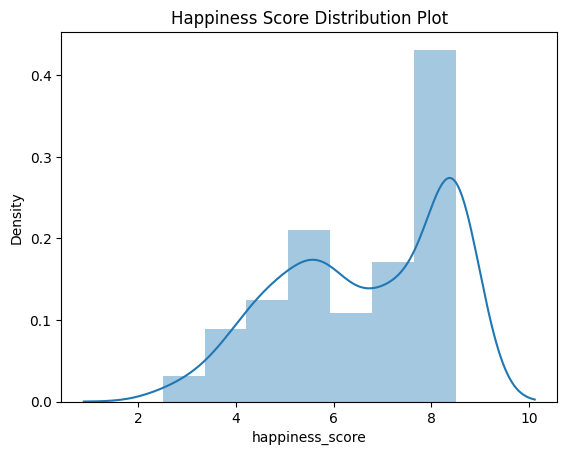

In [ ]:
# Data distribution for our target variable 'happiness_score'
if not df.empty:
    plt.title('Happiness Score Distribution Plot')
    sns.distplot(df['happiness_score'])
    plt.show()

# check the relationship between Happiness Score and Average Income

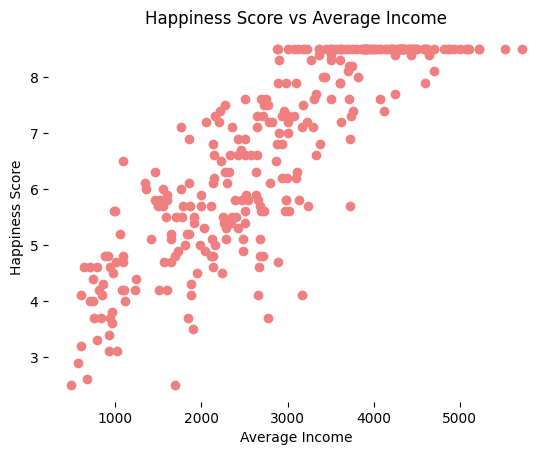

In [ ]:
# Relationship between Happiness Score and Average Income
if not df.empty:
    plt.scatter(df['avg_income'], df['happiness_score'], color = 'lightcoral')
    plt.title('Happiness Score vs Average Income')
    plt.xlabel('Average Income')
    plt.ylabel('Happiness Score')
    plt.box(False)
    plt.show()

# Split the dataset into dependent/independent variables
Average Income (X) is the independent variable

Happiness Score (y) is dependent on average income

In [23]:
# Splitting variables

X = df[['avg_income']]  # Independent (needs to be a DataFrame)
y = df[['happiness_score']] # Dependent (needs to be a DataFrame)

# Split data into Train/Test sets

In [22]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train the regression model

In [20]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Predict the result

In [21]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

# Plot the training and test results

## Plot training set data vs predictions

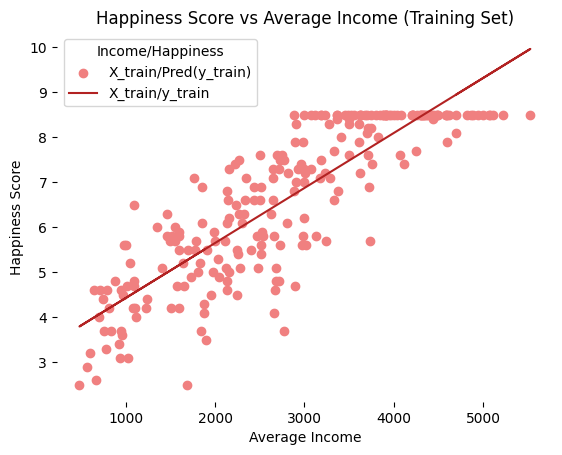

In [ ]:
# Prediction on training set
if not df.empty:
    plt.scatter(X_train, y_train, color = 'lightcoral')
    plt.plot(X_train, y_pred_train, color = 'firebrick')
    plt.title('Happiness Score vs Average Income (Training Set)')
    plt.xlabel('Average Income')
    plt.ylabel('Happiness Score')
    plt.legend(['X_train/Pred(y_train)', 'X_train/y_train'], title = 'Income/Happiness', loc='best', facecolor='white')
    plt.box(False)
    plt.show()

## Plot test set data vs predictions

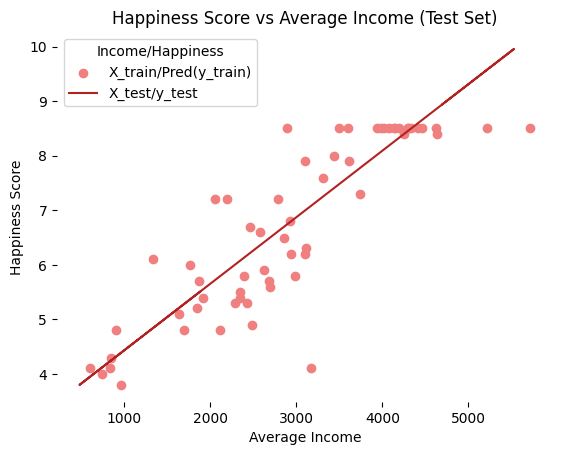

In [ ]:
# Prediction on test set
if not df.empty:
    plt.scatter(X_test, y_test, color = 'lightcoral')
    plt.plot(X_train, y_pred_train, color = 'firebrick') # The regression line is the same
    plt.title('Happiness Score vs Average Income (Test Set)')
    plt.xlabel('Average Income')
    plt.ylabel('Happiness Score')
    plt.legend(['X_train/Pred(y_train)', 'X_test/y_test'], title = 'Income/Happiness', loc='best', facecolor='white')
    plt.box(False)
    plt.show()

In [ ]:
# Regressor coefficients and intercept
if not df.empty:
    print(f'Coefficient: {regressor.coef_}')
    print(f'Intercept: {regressor.intercept_}')

Coefficient: [[0.00121994]]
Intercept: [3.21194342]


# **Multiple Linear Regression - City Lifestyle**

# Import data

In [18]:
# Get dataset
try:
    df = pd.read_csv('Datasets/city_lifestyle_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'city_lifestyle_dataset.csv' not found.")
    df = pd.DataFrame() # Create empty dataframe to avoid errors

df.head()

Dataset loaded successfully.


,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5


# Analyze data

## Describe

In [19]:
df.describe()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3944.843333,2827.200000,74.305333,1002.766667,71.246667,55.717333,6.644000,33.993333
std,2982.566777,1201.163939,17.014492,456.282066,25.344961,14.712549,1.685864,9.434067
min,100.000000,480.000000,34.000000,170.000000,22.000000,15.000000,2.500000,2.000000
25%,1830.000000,1907.500000,64.400000,640.000000,54.000000,46.075000,5.300000,28.225000
50%,3083.500000,2810.000000,75.000000,990.000000,67.500000,54.700000,6.900000,34.700000
75%,4823.750000,3752.500000,87.225000,1332.500000,86.000000,64.200000,8.500000,40.400000
max,14427.000000,5720.000000,100.000000,2430.000000,146.000000,95.000000,8.500000,58.000000


## Distribution

C:\Users\Shreeraj_N_Desai\AppData\Local\Temp\ipykernel_41620\2138493834.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['happiness_score'])


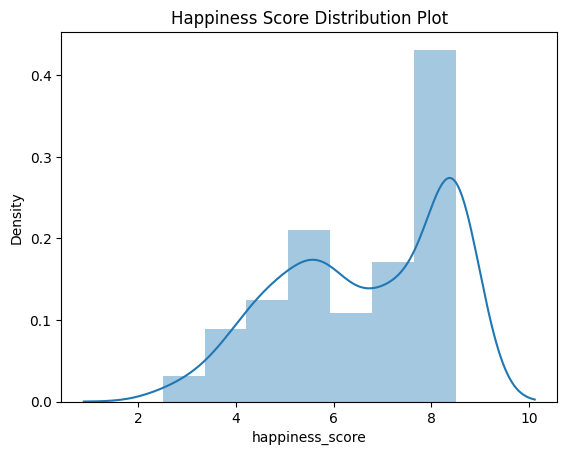

In [13]:
# Data distribution for the target variable 'happiness_score'
if not df.empty:
    plt.title('Happiness Score Distribution Plot')
    sns.distplot(df['happiness_score'])
    plt.show()

## Relationship between Happiness Score and Average Income

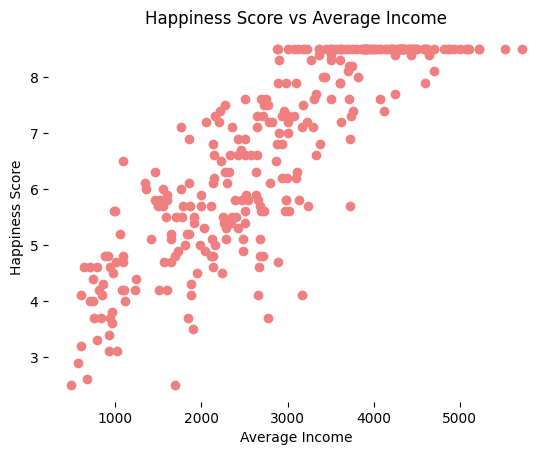

In [5]:
# Relationship between Happiness Score and Average Income
if not df.empty:
    plt.scatter(df['avg_income'], df['happiness_score'], color='lightcoral')
    plt.title('Happiness Score vs Average Income')
    plt.xlabel('Average Income')
    plt.ylabel('Happiness Score')
    plt.box(False)
    plt.show()

# Split into Independent/Dependent variables

In [ ]:
# Split dataset in dependent/independent variables
if not df.empty:
    # X includes all columns except 'city_name' (identifier) and 'happiness_score' (target)
    X = df.drop(['city_name', 'happiness_score'], axis=1).values
    # y is the target variable
    y = df['happiness_score'].values

# One-hot encoding

In [16]:
# One-hot encoding of categorical data ('country' column, which is at index 0)
if not df.empty:
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
    X = np.array(ct.fit_transform(X))
print("Categorical data encoded successfully.\n")

Categorical data encoded successfully.



# Split into Train/Test sets & Train model

In [ ]:
# Split dataset into test/train
if not df.empty:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Train multiple regression model
if not df.empty:
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


# Predict results

In [14]:
# Predict result
if not df.empty:
    y_pred = regressor.predict(X_test)
print("Predictions:", y_pred)

Predictions: [5.99 8.97 7.49 5.28 3.5  5.7  3.71 6.13 8.33 5.05 8.19 8.11 7.29 4.2
 8.56 5.49 8.87 5.11 4.7  8.15 5.15 5.39 6.26 5.25 6.1  6.98 6.63 8.34
 4.86 9.38 5.45 5.65 8.98 6.07 5.8  7.64 8.62 8.84 8.89 8.36 5.85 5.37
 5.65 8.71 8.49 6.08 3.97 4.55 8.13 7.48 5.36 5.63 6.81 6.46 8.81 3.81
 7.1  8.98 8.6  8.85]


# Compare predictions

In [11]:
# Compare predicted result with actual value
if not df.empty:
    np.set_printoptions(precision=2)
    result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
    result_df = pd.DataFrame(result, columns=['Predicted Happiness', 'Actual Happiness'])
    print(result_df)

    Predicted Happiness  Actual Happiness
0              5.992010               5.8
1              8.974094               8.5
2              7.488042               7.6
3              5.277638               4.8
4              3.498565               4.1
5              5.698149               6.2
6              3.709710               3.8
7              6.125420               6.0
8              8.332539               8.0
9              5.053326               5.4
10             8.185635               8.5
11             8.111374               8.5
12             7.285243               7.9
13             4.198585               4.0
14             8.558557               8.5
15             5.486643               4.9
16             8.870806               8.5
17             5.113909               5.5
18             4.697188               4.8
19             8.152340               8.5
20             5.151206               5.1
21             5.390972               5.3
22             6.263260           